In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import sklearn
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### Data analysis

In [2]:
data_v01 = pd.read_excel('database_v01.xlsx', index_col=False)
data_v02 = pd.read_excel('database_v02.xlsx', index_col=False)
data_v03 = pd.read_excel('database_v03.xlsx', index_col=False)

In [3]:
data_v03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hm0 d     5670 non-null   float64
 1   Tp d      5670 non-null   float64
 2   Tm d      5670 non-null   float64
 3   Tm1,0 d   5670 non-null   float64
 4   hdeep     5670 non-null   float64
 5   mmm       5670 non-null   float64
 6   β         5670 non-null   float64
 7   Spread s  5670 non-null   float64
 8   h         5670 non-null   float64
 9   Hm0 toe   5670 non-null   float64
 10  Tp toe    5670 non-null   float64
 11  Tm toe    5670 non-null   float64
 12  Tm1,0t    5670 non-null   float64
 13  ht        5670 non-null   float64
 14  Bt        5670 non-null   float64
 15  cotαd     5670 non-null   float64
 16  cotαu     5670 non-null   float64
 17  cotαexcl  5670 non-null   float64
 18  cotαincl  5670 non-null   float64
 19  gf_d      5670 non-null   float64
 20  D50_d     5670 non-null   floa

In [4]:
data_v01.iloc[0]

Hm0 d         0.231872
Tp d          2.061655
Tm d          1.718046
Tm1,0 d       1.874232
hdeep         0.368887
mmm         250.000000
β             0.000000
Spread s      0.000000
h             0.267707
Hm0 toe       0.134696
Tp toe        2.293954
Tm toe        1.911629
Tm1,0t        2.085413
ht            0.145447
Bt            0.105396
cotαd         2.000000
cotαu         2.000000
cotαexcl      2.000000
cotαincl      2.000000
gf_d          0.470000
D50_d         0.035413
gf_u          0.470000
D50_u         0.035413
gf            0.470000
D             0.035413
Rc            0.122260
B             0.000000
hb            0.000000
tanαB         0.000000
Bh            0.000000
Ac            0.149663
Gc            0.181282
RF            2.000000
CF            2.000000
WF            4.000000
q             0.000275
Name: 0, dtype: float64

In [ ]:
px.histogram(data_v01, x="Hm0 d")

In [ ]:
px.box(data_v01, x="Hm0 d", title='Distribution of Hm0 d feature', points='all')

In [ ]:
px.box(data_v02, x="Hm0 d", points='all',title='Distribution of Hm0 d feature')

In [ ]:
for c in data_v01.columns[:-1]:
    fig = px.box(data_v01, x=c, title=f'Distribution of {c} feature before scaling', points='all')
    fig.write_image(f"graphs/{c}_before_scaling.png")
    fig = px.box(data_v02, x=c, points='all', title=f'Distribution of {c} feature after scaling')
    fig.write_image(f"graphs/{c}_after_scaling.png")

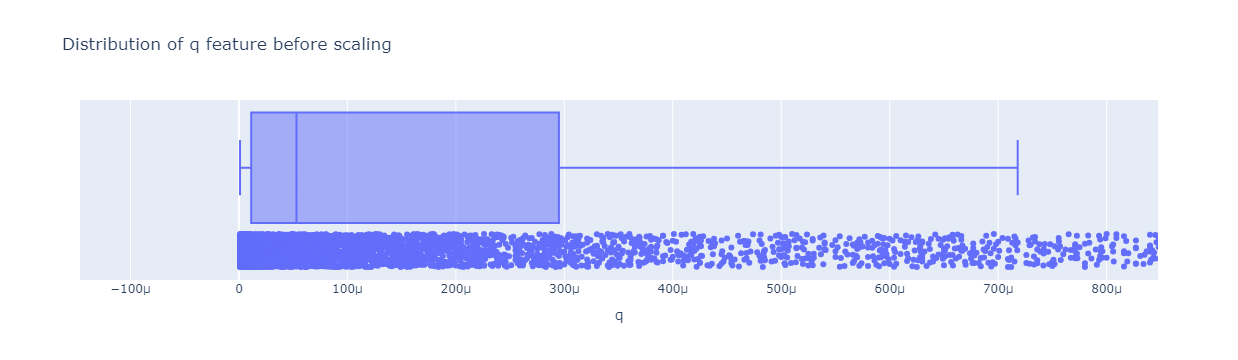

In [4]:
px.box(data_v01, x="q", points='all',title='Distribution of q output before scaling')

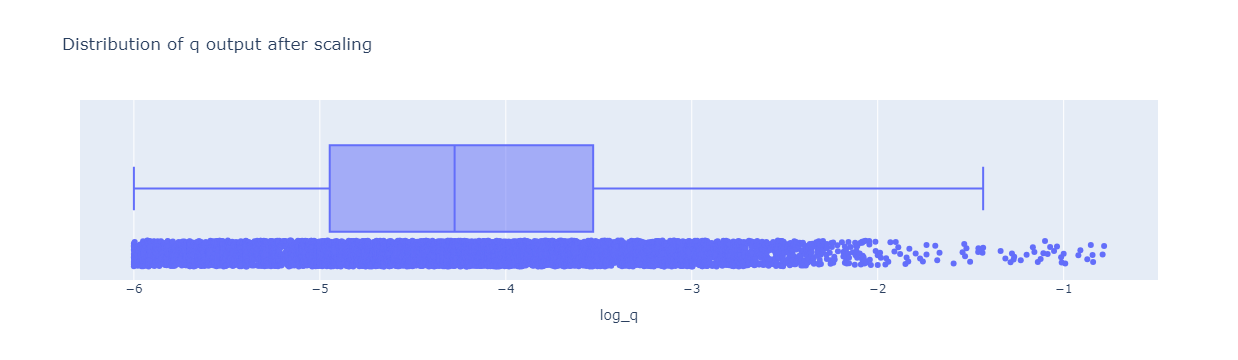

In [6]:
px.box(data_v03, x="log_q", points='all',title='Distribution of q output after scaling')

In [8]:
fig = px.box(data_v01, x="q", points='all',title='Distribution of q output before scaling')
fig.write_image(f"graphs/q_scaling/q_before_scaling.png")
fig = px.box(data_v03, x="log_q", points='all',title='Distribution of q output after scaling')
fig.write_image(f"graphs/q_scaling/log_q_before_scaling.png")

### Model analysis

In [5]:
xbg_reg_loaded = xgb.XGBRegressor()

In [6]:
xbg_reg_loaded.load_model('model_10_06_mape494.json')

In [7]:
train_df = pd.read_excel('train_data_19_03.xlsx', index_col=False)

In [8]:
test_df = pd.read_excel('test_data_19_03.xlsx', index_col=False)

In [9]:
X_train = train_df[train_df.columns[:-1]]
y_train = train_df[train_df.columns[-1]]

X_test = test_df[test_df.columns[:-1]]
y_test = test_df[test_df.columns[-1]]

In [31]:
preds = xbg_reg_loaded.predict(X_test)
mape = mean_absolute_percentage_error(y_test, preds)
mape*100

4.9434352513738204

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [33]:
rmse

0.289491679933093

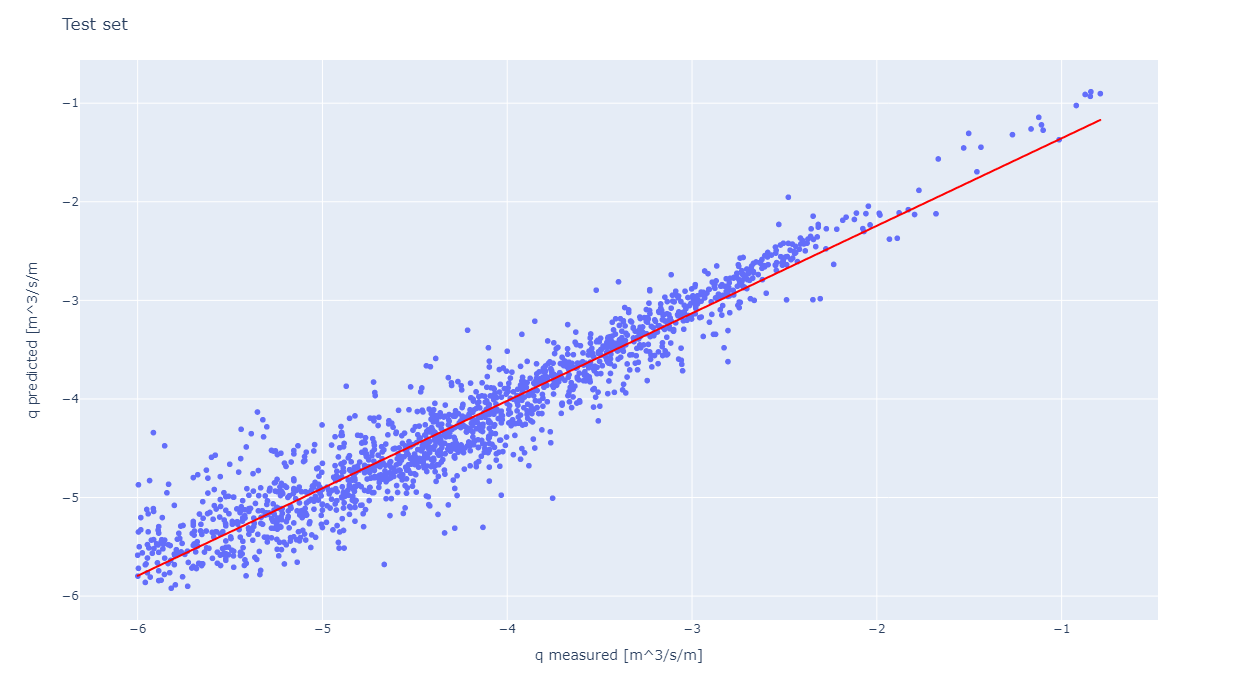

In [34]:
fig = px.scatter(x=y_test, y=preds, trendline="ols", trendline_color_override="red", width=700, height=700)
fig.update_layout(
    title='Test set',
    xaxis_title="q measured [m^3/s/m]",
    yaxis_title="q predicted [m^3/s/m")
fig.show()
fig.write_image(f"graphs/q_measure_vs_predict_test.png")

In [35]:
preds = xbg_reg_loaded.predict(X_train)
mape = mean_absolute_percentage_error(y_train, preds)
mape*100

1.0248118975614282

In [36]:
rmse = np.sqrt(mean_squared_error(y_train, preds))

In [37]:
rmse

0.07073131149598495

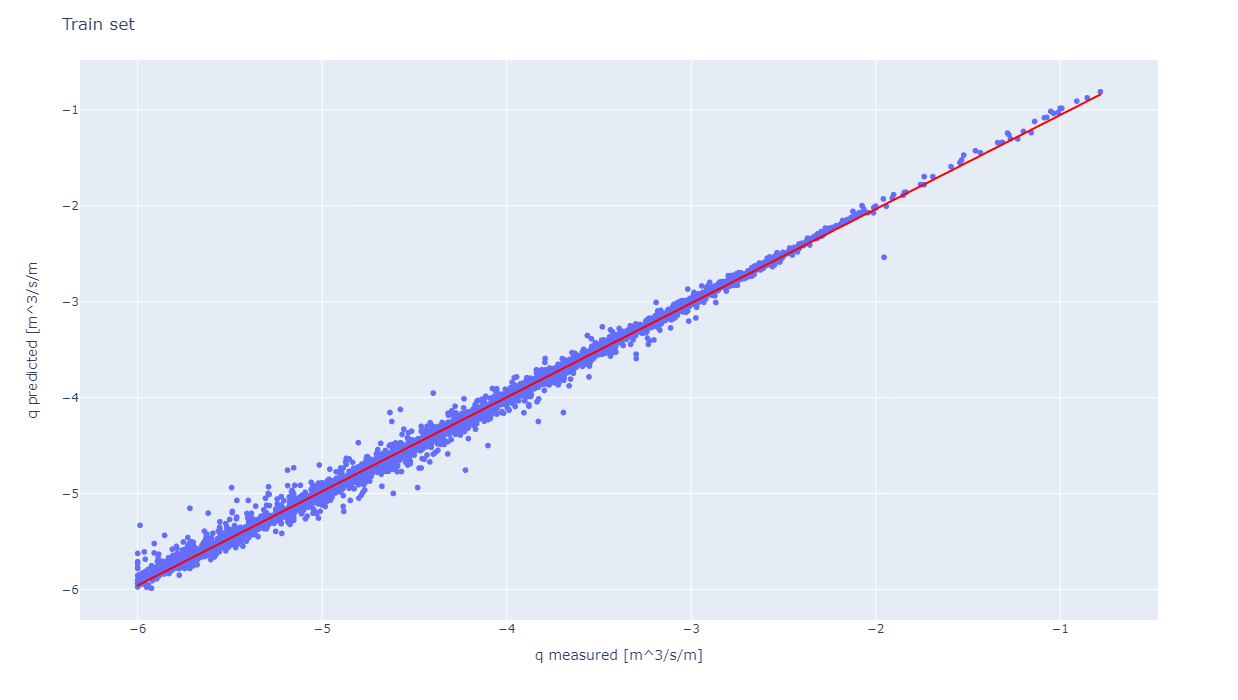

In [38]:
fig = px.scatter(x=y_train, y=preds, trendline="ols", trendline_color_override="red", width=700, height=700)
fig.update_layout(
    title='Train set',
    xaxis_title="q measured [m^3/s/m]",
    yaxis_title="q predicted [m^3/s/m")
fig.show()
fig.write_image(f"graphs/q_measure_vs_predict_train.png")

In [40]:
X_train_test = np.concatenate([X_train, X_test])

In [41]:
y_train_test = np.concatenate([y_train, y_test])

In [42]:
preds = xbg_reg_loaded.predict(X_train_test)
mape = mean_absolute_percentage_error(y_train_test, preds)
mape*100

2.2003989037051457

In [43]:
rmse = np.sqrt(mean_squared_error(y_train_test, preds))
rmse

0.16924441711118496

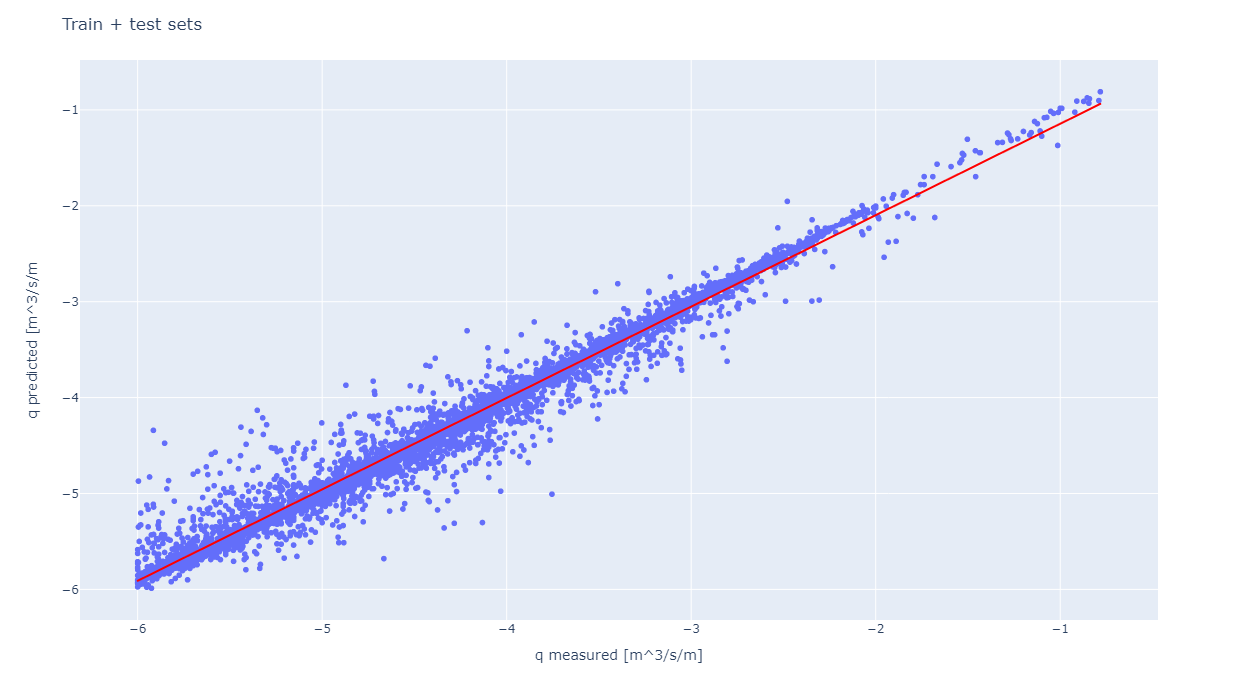

In [44]:
fig = px.scatter(x=y_train_test, y=preds, trendline="ols", trendline_color_override="red", width=700, height=700)
fig.update_layout(
    title='Train + test sets',
    xaxis_title="q measured [m^3/s/m]",
    yaxis_title="q predicted [m^3/s/m")
fig.show()
fig.write_image(f"graphs/q_measure_vs_predict_train_test.png")

In [47]:
preds = xbg_reg_loaded.predict(X_test)
mape = mean_absolute_percentage_error(y_test, preds)
mape*100

4.9434352513738204

In [48]:
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [49]:
rmse

0.289491679933093

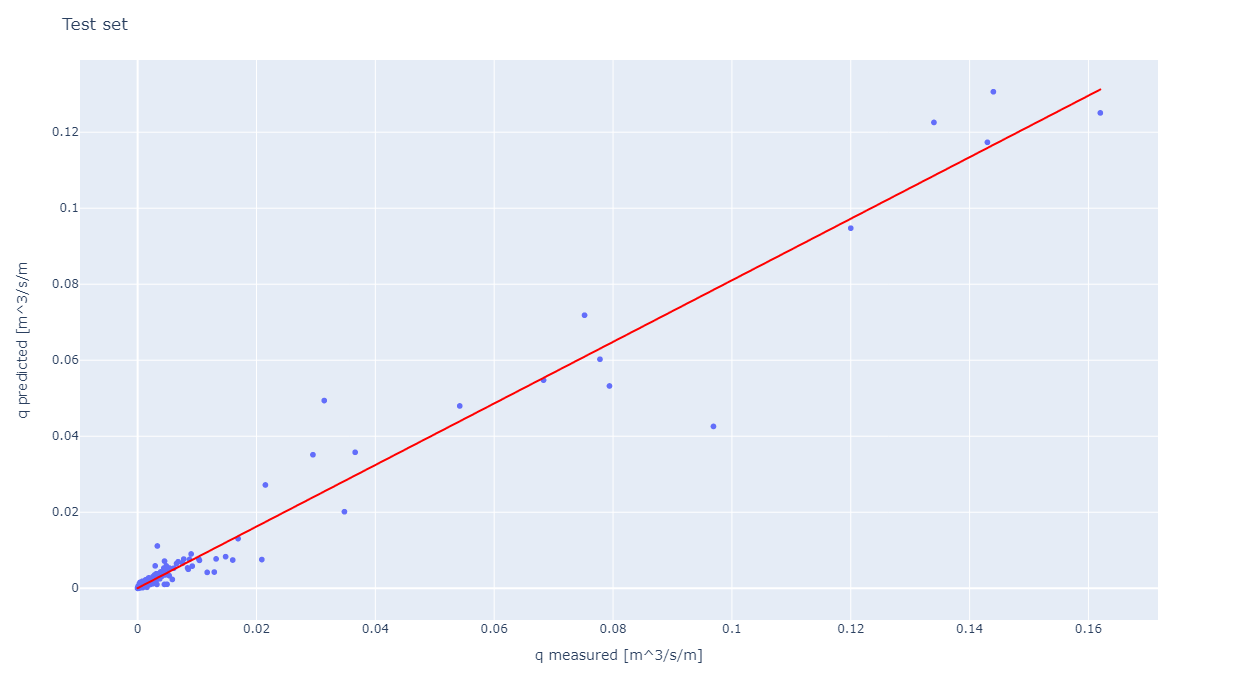

In [51]:
fig = px.scatter(x=10**y_test, y=10**preds, trendline="ols", trendline_color_override="red", width=700, height=700)
fig.update_layout(
    title='Test set',
    xaxis_title="q measured [m^3/s/m]",
    yaxis_title="q predicted [m^3/s/m")
fig.show()
fig.write_image(f"graphs/q_measure_vs_predict_test_normal_scale.png")

In [52]:
preds = xbg_reg_loaded.predict(X_train)
mape = mean_absolute_percentage_error(y_train, preds)
mape*100

1.0248118975614282

In [53]:
rmse = np.sqrt(mean_squared_error(y_train, preds))

In [54]:
rmse

0.07073131149598495

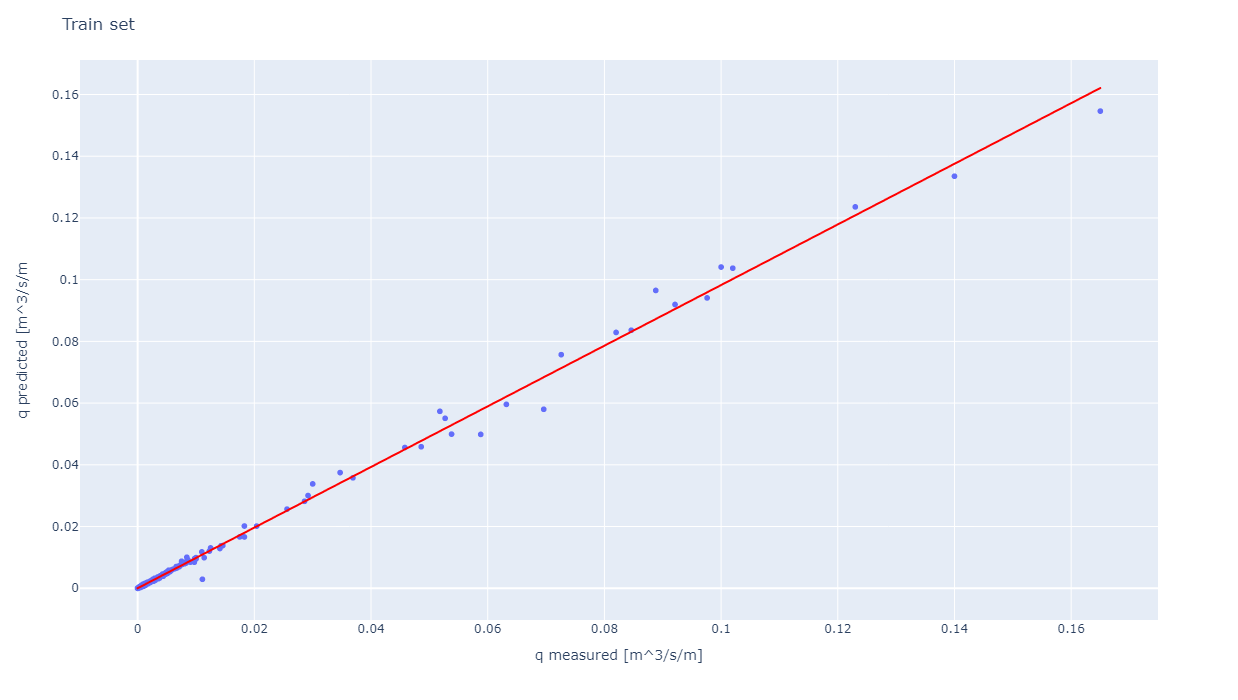

In [56]:
fig = px.scatter(x=10**y_train, y=10**preds, trendline="ols", trendline_color_override="red", width=700, height=700)
fig.update_layout(
    title='Train set',
    xaxis_title="q measured [m^3/s/m]",
    yaxis_title="q predicted [m^3/s/m")
fig.show()
fig.write_image(f"graphs/q_measure_vs_predict_train_normal_scale.png")

In [57]:
X_train_test = np.concatenate([X_train, X_test])

In [58]:
y_train_test = np.concatenate([y_train, y_test])

In [59]:
preds = xbg_reg_loaded.predict(X_train_test)
mape = mean_absolute_percentage_error(y_train_test, preds)
mape*100

2.2003989037051457

In [60]:
rmse = np.sqrt(mean_squared_error(y_train_test, preds))
rmse

0.16924441711118496

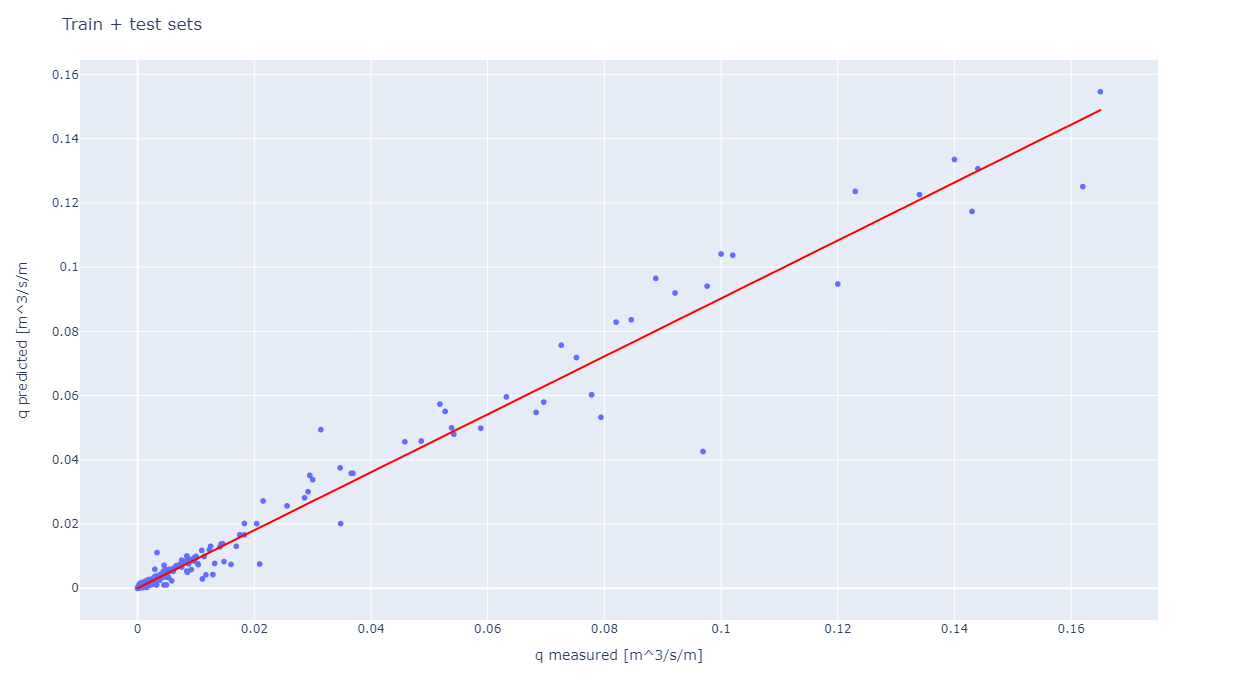

In [61]:
fig = px.scatter(x=10**y_train_test, y=10**preds, trendline="ols", trendline_color_override="red", width=700, height=700)
fig.update_layout(
    title='Train + test sets',
    xaxis_title="q measured [m^3/s/m]",
    yaxis_title="q predicted [m^3/s/m")
fig.show()
fig.write_image(f"graphs/q_measure_vs_predict_train_test_scale.png")

### Bias and R_sq

In [80]:
preds = xbg_reg_loaded.predict(X_test)
mape = mean_absolute_percentage_error(y_test, preds)
mape*100

4.9434352513738204

In [81]:
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [82]:
rmse

0.289491679933093

In [83]:
bias = (preds-y_test).sum()/len(preds)

In [88]:
bias

0.0021178972266960136

In [90]:
R_sq = sklearn.metrics.r2_score(y_test, preds)

In [91]:
R_sq

0.9113268298380013

In [92]:
preds = xbg_reg_loaded.predict(X_train)
mape = mean_absolute_percentage_error(y_train, preds)
mape*100

1.0248118975614282

In [93]:
rmse = np.sqrt(mean_squared_error(y_train, preds))

In [94]:
rmse

0.07073131149598495

In [95]:
bias = (preds-y_train).sum()/len(preds)

In [96]:
bias

0.007532089985761239

In [97]:
R_sq = sklearn.metrics.r2_score(y_train, preds)

In [98]:
R_sq

0.9947251697838604

In [99]:
X_train_test = np.concatenate([X_train, X_test])

In [100]:
y_train_test = np.concatenate([y_train, y_test])

In [101]:
preds = xbg_reg_loaded.predict(X_train_test)
mape = mean_absolute_percentage_error(y_train_test, preds)
mape*100

2.2003989037051457

In [102]:
rmse = np.sqrt(mean_squared_error(y_train_test, preds))

In [103]:
rmse

0.16924441711118496

In [104]:
bias = (preds-y_train_test).sum()/len(preds)

In [105]:
bias

0.005907832158041673

In [106]:
R_sq = sklearn.metrics.r2_score(y_train_test, preds)

In [107]:
R_sq

0.9697766782127711